# GROUP 4

Dataset link- https://www.kaggle.com/c/nlp-getting-started/overview

### AIM- To predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

### Columns
Id - a unique identifier for each tweet

Text - the text of the tweet

Location - the location the tweet was sent from

Keyword - a particular keyword from the tweet

Target - this denotes whether a tweet is about a real disaster or not

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Merlin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
train_data = pd.read_csv(r"C:\Users\Merlin\Downloads\train.csv")

In [37]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [38]:
train_data=train_data.dropna()

In [39]:
# Checking target column 
np.unique(train_data.target, return_counts=True)

(array([0, 1], dtype=int64), array([2884, 2196], dtype=int64))

In [40]:
train_data.shape

(5080, 5)

### Visualizing data distribution

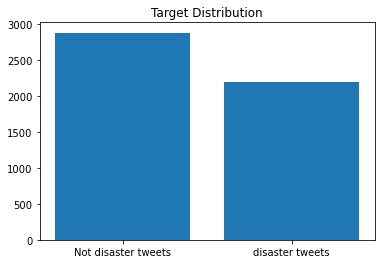

In [41]:
# Counting the number of meaning tweet (1 is real disaster, 0 is no disaster)
target_count = train_data.groupby('target').size().reset_index(name='counts')
plt.bar(target_count.target, target_count.counts)
plt.xticks([0,1], labels=["Not disaster tweets", "disaster tweets"])
plt.title("Target Distribution")
plt.show()

### Number of characters in tweets

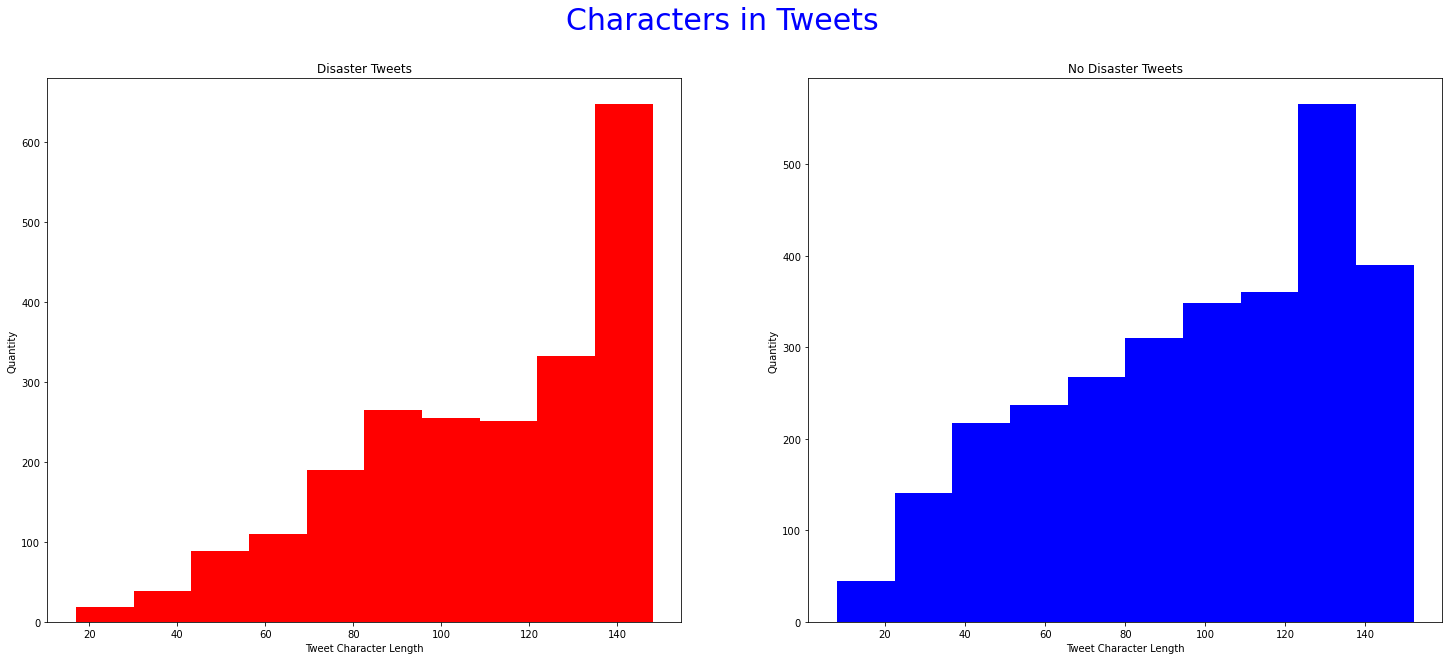

In [42]:
# Define the default histogram chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle("Characters in Tweets", color="Blue", size=30)
# Disaster Chart
disaster_len = train_data[train_data.target==1].text.str.len()
ax1.hist(disaster_len, color='red')
ax1.set_title("Disaster Tweets")
ax1.set_xlabel("Tweet Character Length")
ax1.set_ylabel("Quantity")
# No Disaster Chart
nodisaster_len = train_data[train_data.target==0].text.str.len()
ax2.hist(nodisaster_len, color='blue')
ax2.set_title("No Disaster Tweets")
ax2.set_xlabel("Tweet Character Length")
ax2.set_ylabel("Quantity")
# Display charts
plt.show()

### Number of Words in a tweet

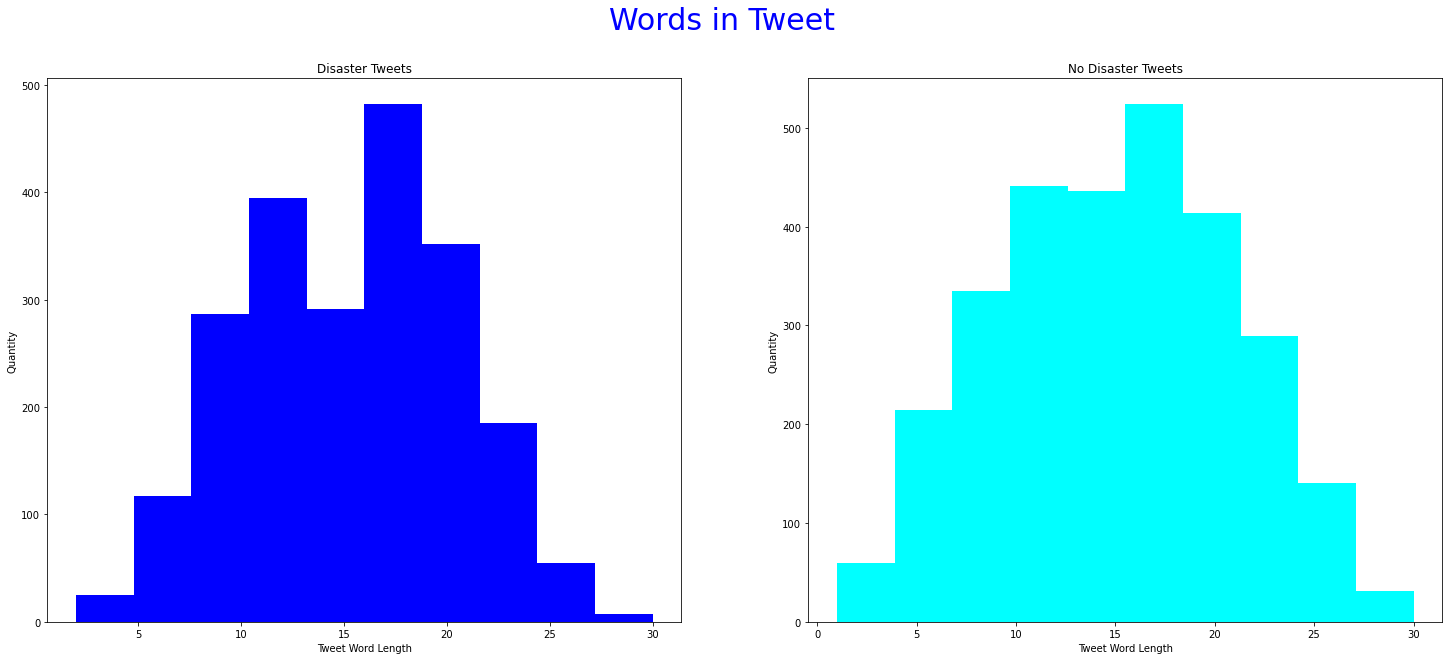

In [43]:
# Define the defaults histogram
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,10))
fig.suptitle("Words in Tweet", size=30, color="Blue")
# Disaster chart
DisasterWord_len=train_data[train_data.target==1].text.str.split().map(lambda x: len(x))
ax1.hist(DisasterWord_len, color='Blue')
ax1.set_title("Disaster Tweets")
ax1.set_xlabel("Tweet Word Length")
ax1.set_ylabel("Quantity")
# No Disaster chart
NoDisasterWord_len = train_data[train_data.target==0].text.str.split().map(lambda x: len(x))
ax2.hist(NoDisasterWord_len, color='Cyan')
ax2.set_title("No Disaster Tweets")
ax2.set_xlabel("Tweet Word Length")
ax2.set_ylabel("Quantity")
# Display Histogram
plt.show()

### Average Word Length in a Tweet

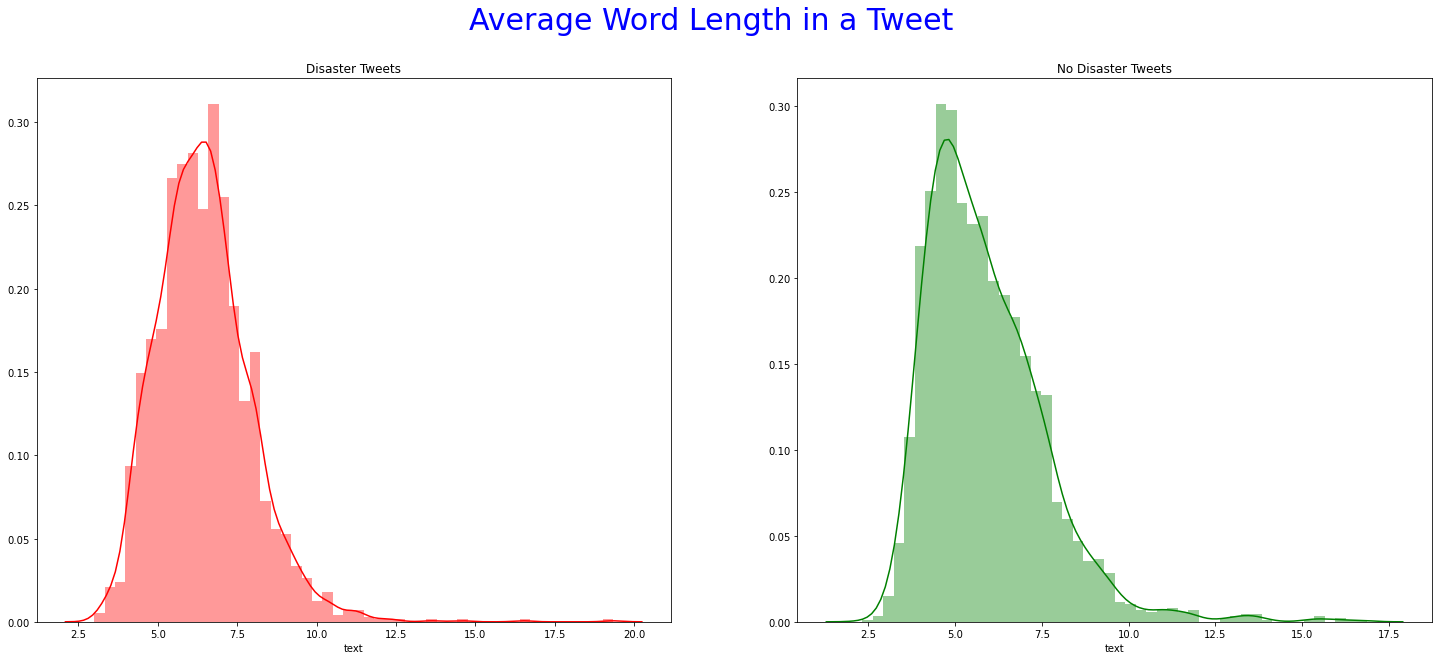

In [44]:
# Define the default plots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,10))
fig.suptitle("Average Word Length in a Tweet", color="blue", size=30)
# Disaster Plot
DisasterAvgWord_len = train_data[train_data.target==1].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(DisasterAvgWord_len.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title("Disaster Tweets")
# Distribution Plots
NoDisasterAvgWord_len= train_data[train_data.target==0].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(NoDisasterAvgWord_len.map(lambda x: np.mean(x)), ax=ax2, color="green")
ax2.set_title("No Disaster Tweets")
# Display Plots
plt.show()

In [45]:
train_data["keyword"].nunique()

221

### Top 20 Most used Keywords

Text(0.5, 0, 'Count of Keywords')

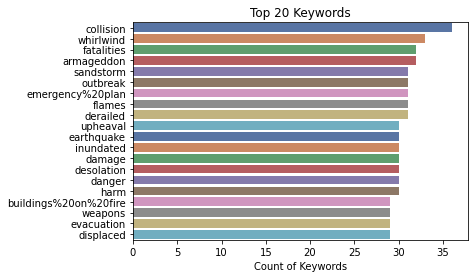

In [46]:
chains=train_data['keyword'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")

# Data Cleaning and Preprocessing

In [47]:
def preprocess(reviews):
    tokenizer = RegexpTokenizer(r'\w+')
    review = str(reviews)
    review = review.lower()
    review = review.replace("<br /><br />", "")
    tokens = tokenizer.tokenize(review)

    stop_words = set(stopwords.words('english'))
    stopwords_removed = [i for i in tokens if i not in stop_words]

    ps = PorterStemmer()
    stem_text = [ps.stem(i) for i in stopwords_removed]

    cleaned_reviews = " ".join(stem_text)

    return cleaned_reviews

In [48]:
# CLeaning our training Data
X = train_data.text.apply(preprocess)
y = train_data.target

# Splitting the Data into Train and Test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.20, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4064,) (4064,)
(1016,) (1016,)


# Creating Model Pipeline

In [50]:
model1 = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('mnb', MultinomialNB())
])
model2 = Pipeline([
    ('c_vec', CountVectorizer()), 
    ('mnb', MultinomialNB())
])
model3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bern', BernoulliNB())
])
model4 = Pipeline([
    ('c_vec', CountVectorizer()),
    ('bern', BernoulliNB())
])

In [51]:
# Fitting and training the model now
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

Pipeline(steps=[('c_vec', CountVectorizer()), ('bern', BernoulliNB())])

In [52]:
print('Model 1 Train score', model1.score(X_train,y_train))
print('Model 1 Test score', model1.score(X_test,y_test))
print()
print('Model 2 Train score', model2.score(X_train,y_train))
print('Model 2 Test score', model2.score(X_test,y_test))
print()
print('Model 3 Train score', model3.score(X_train,y_train))
print('Model 3 Test score', model3.score(X_test,y_test))
print()
print('Model 4 Train score', model4.score(X_train,y_train))
print('Model 4 Test score', model4.score(X_test,y_test))

Model 1 Train score 0.9121555118110236
Model 1 Test score 0.7933070866141733

Model 2 Train score 0.9296259842519685
Model 2 Test score 0.7893700787401575

Model 3 Train score 0.9092027559055118
Model 3 Test score 0.7834645669291339

Model 4 Train score 0.9092027559055118
Model 4 Test score 0.7834645669291339


# Visualizing the accuracy from the models

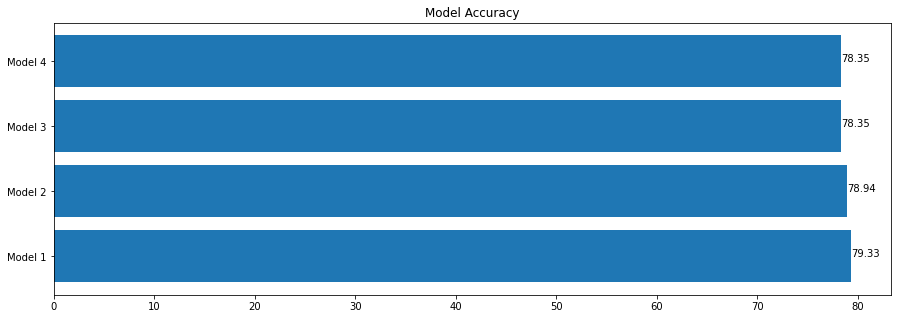

In [53]:
models = {'Model 1': model1.score(X_test,y_test),
          'Model 2': model2.score(X_test,y_test),
          'Model 3': model3.score(X_test,y_test),
          'Model 4': model4.score(X_test,y_test)
         }
keys = [i for i in models.keys()]
#print(keys)
values = [i*100 for i in models.values()]
#print(values)
plt.figure(figsize=(15,5))
plt.barh(keys, values)
  
for index, value in enumerate(values):
    plt.text(value, index,
             str("%.2f"%value))
plt.title("Model Accuracy")
plt.show()

### We can conclude that Model 1 gives the best accuracy of 79.33%

# Predicting on Test data using Model 1

In [54]:
test_data = pd.read_csv(r"C:\Users\Merlin\Downloads\test.csv")

In [55]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
test_data=test_data.dropna()

In [57]:
# Cleaning the test data
test_set = test_data.text.apply(preprocess)

In [58]:
pred = model1.predict(test_set)

In [59]:
# Creating a new DataFrame of prediction
pred_df = pd.DataFrame(list(zip(test_data.iloc[:,0],pred)), columns=['id', 'target'])

In [60]:
pred_df.to_csv('pred.csv', index=False)